In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from skimage import filters,measure
import numpy as np
from scipy.ndimage import gaussian_filter



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
img = Image.open("image1.tiff") 
img = np.asarray(img)


In [3]:
#smoothing
smoothed_image = gaussian_filter(img, sigma=1)

In [4]:
#thresholding
from skimage.filters import threshold_otsu

#otsu's
threshold_value = threshold_otsu(smoothed_image)
print("Otsu's Threshold:", threshold_value)

#segment the image
segmented_image = smoothed_image < threshold_value

Otsu's Threshold: 189


/var/folders/x5/bffgyw155ll40t7fzd01yz440000gn/T/ipykernel_6136/3467245144.py:5: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (1266, 1096, 3) looks like that of an RGB image.
  threshold_value = threshold_otsu(smoothed_image)


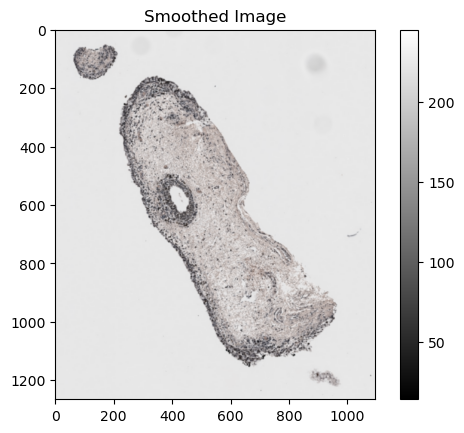

In [5]:
#smoothed image
plt.imshow(smoothed_image, cmap='gray')
plt.title("Smoothed Image")
plt.colorbar()
plt.show()

In [6]:
unmasked_image = np.zeros_like(img)
unmasked_image[segmented_image] = img[segmented_image]

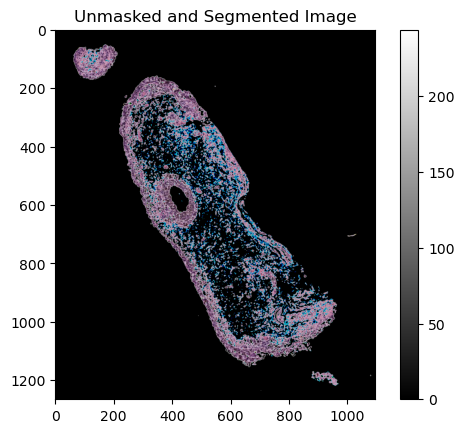

In [7]:
#unmasked segmented regions
plt.imshow(unmasked_image, cmap='gray')
plt.title("Unmasked and Segmented Image")
plt.colorbar()
plt.show()

In [9]:
#saving and converting image
result_image = Image.fromarray(unmasked_image.astype(np.uint8))
#result_image.save("segmented_output.tiff")